In [143]:
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np 
from pyvis.network import Network

In [144]:
class USA:
    def __init__(self, From, To, label):
        self.From = From
        self.To = To
        self.label = label

In [145]:
USA_President = []
with open("us_edgelist.csv") as USAData:
    reader = csv.DictReader(USAData)
    for row in reader:
        From = row['From']
        To = row['To']
        label = From + '--' + '"' + To +'"' 
        USA_President.append(USA(From, To, label))

In [146]:
df = pd.read_csv("us_edgelist.csv")

In [147]:
df.head()

,From,To
0,Clinton,Hillary
1,Bush,Laura
2,Obama,Michelle
3,Trump,Ivanka
4,Clinton,G.Bush


In [148]:
USAGraph = nx.Graph()

In [149]:
USAInfo = USA_President[0:25]

In [150]:
USA_graph = nx.from_pandas_edgelist(df,source="From",target="To")

In [151]:
nx.info(USA_graph)

'Graph with 19 nodes and 21 edges'

In [152]:
for a in USAInfo:
    USAGraph.add_node(a.label, label = a.label,size= 10, color='blue')

In [153]:
# Check All Nodes
USA_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy'))

In [154]:
len(USA_graph.nodes())

19

In [155]:
# Check All edges
len(USA_graph.edges())

21

In [156]:
USA_graph.add_edge("Franklin","Lincoln")

In [157]:
USA_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy', 'Franklin', 'Lincoln'))

C:\Users\syq65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\syq65\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


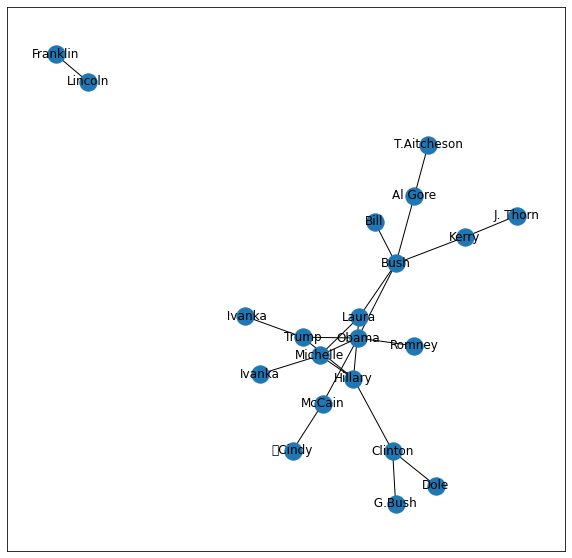

In [158]:
#Visualization 
plt.figure(figsize=(10,10))
nx.draw_networkx(USA_graph)
plt.show()

In [159]:
# Most influential
nx.degree_centrality(USA_graph)

{'Clinton': 0.15000000000000002,
 'Hillary': 0.2,
 'Bush': 0.25,
 'Laura': 0.15000000000000002,
 'Obama': 0.25,
 'Michelle': 0.2,
 'Trump': 0.15000000000000002,
 ' Ivanka': 0.05,
 ' G.Bush ': 0.05,
 'Dole': 0.05,
 'Al Gore': 0.1,
 'Kerry': 0.1,
 'McCain': 0.1,
 'Romney': 0.05,
 'Bill': 0.05,
 'Ivanka': 0.05,
 'J. Thorn': 0.05,
 'T.Aitcheson': 0.05,
 '\tCindy': 0.05,
 'Franklin': 0.05,
 'Lincoln': 0.05}

In [160]:
sorted(nx.degree_centrality(USA_graph).values())

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.1,
 0.1,
 0.1,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.2,
 0.2,
 0.25,
 0.25]

In [161]:
most_influential = nx.degree_centrality(USA_graph)

In [162]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

Bush 0.25
Obama 0.25
Hillary 0.2
Michelle 0.2
Clinton 0.15000000000000002
Laura 0.15000000000000002
Trump 0.15000000000000002
Al Gore 0.1
Kerry 0.1
McCain 0.1
 Ivanka 0.05
 G.Bush  0.05
Dole 0.05
Romney 0.05
Bill 0.05
Ivanka 0.05
J. Thorn 0.05
T.Aitcheson 0.05
	Cindy 0.05
Franklin 0.05
Lincoln 0.05


In [163]:
from pyvis.network import Network
nt = Network('1080px', '1920px')
nt.barnes_hut()
nt.from_nx(USA_graph)
nt.show_buttons(filter_=['physics'])
nt.show('nx.html')

### Conclusion: Bush and Obama are the most influencial people.